
Steps for EDA of Time Series Data
1. Load the data
2. Check the data type of the columns
3. Convert the date column to datetime format   
4. Set the date column as the index of the dataframe
5. Check for missing values
6. Plot the time series data
7. Check for stationarity
8. Make the time series data stationary
9. Decompose the time series data
10. Forecast a time series data
11. Evaluate the model
12. Make predictions
13. Conclusion


In [3]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # to set the working directory
import  sys # to get the current working directory
%matplotlib inline


# Data Ingestion

Import the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

Load the Data.

Load the Time Series Data into a pandas dataframe.

Set the datetime column as the index of the dataframe.

Check the datatype of the index and convert it to datetime if necessary.

In [4]:
#load the data

df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [5]:
df.shape

(758, 8)

In [6]:
# check the data type of the columns
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits    float64
dtype: object

<Axes: >

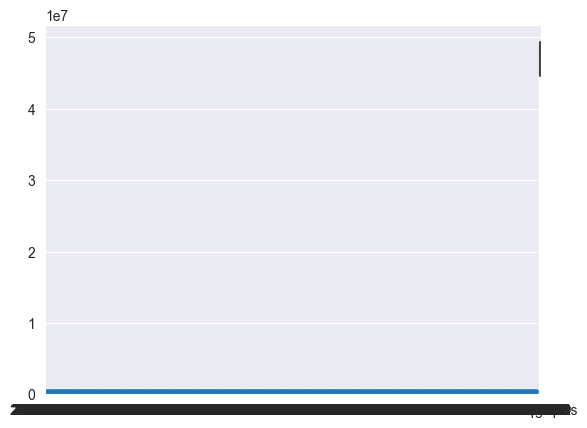

In [7]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])
sns.barplot(df)

## Univariant Analysis of the data:univariant analysis is the simplest form of data analysis where we examine the data in terms of one variable at a time.
## biavariant analysis: biavariant analysis is the analysis of two variables to understand the relationship between them.

In [8]:
## Univerant Analysis

stock = df[['Date','Close']]


In [9]:
stock.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [10]:
stock

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [11]:
stock.dtypes

Date      object
Close    float64
dtype: object

In [12]:
stock['Date'] = pd.to_datetime(stock['Date'])

C:\Users\Shadab Khan\AppData\Local\Temp\ipykernel_20108\2362666149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['Date'] = pd.to_datetime(stock['Date'])


In [13]:
stock.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [14]:
## setting the index of dataframe as date

stock = stock.set_index('Date')
stock.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


# why we are converting date column as a index column

1. i can easily retrive the data
2. visulization is also simple
3. those lib has been degine in such a way it required date column as a index(scipy statsmodel)

In [15]:
stock.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


In [16]:
stock.tail()

,Close
Date,
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998
2022-05-19,709.419983
2022-05-20,663.900024


In [17]:
stock.shape

(758, 1)

In [18]:
stock.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


In [19]:
stock.dtypes

Close    float64
dtype: object

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


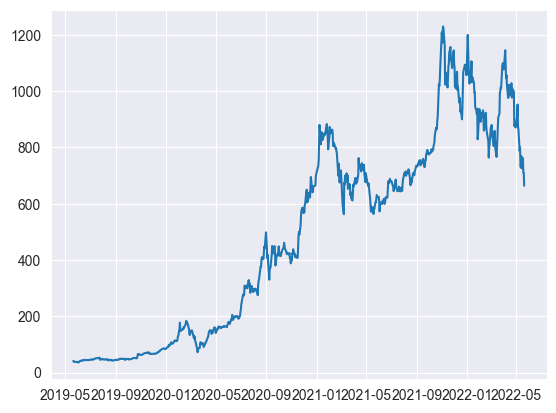

In [20]:
plt.plot(stock.Close)

C:\Users\Shadab Khan\AppData\Local\Temp\ipykernel_20108\938778873.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock.Close)


<Axes: xlabel='Close', ylabel='Density'>

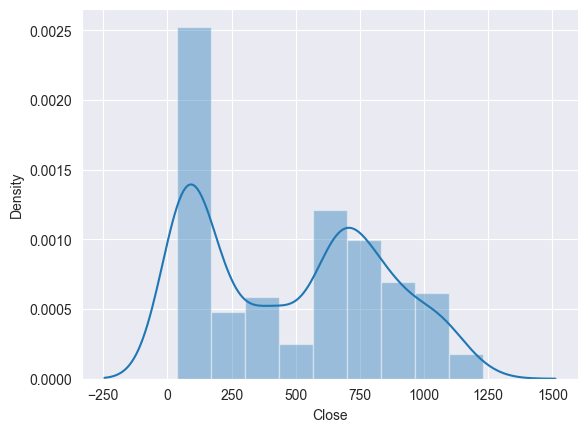

In [21]:
sns.distplot(stock.Close)

<Axes: ylabel='Density'>

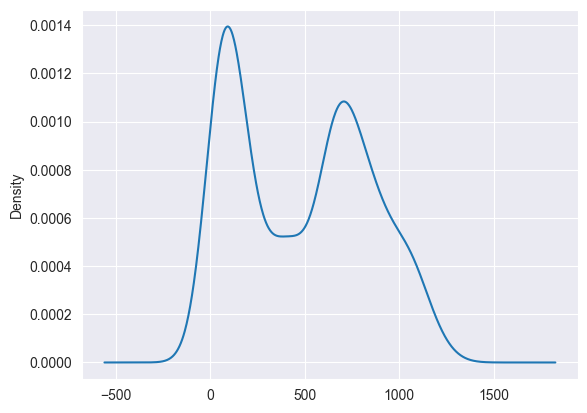

In [22]:
stock.Close.plot(kind='kde')

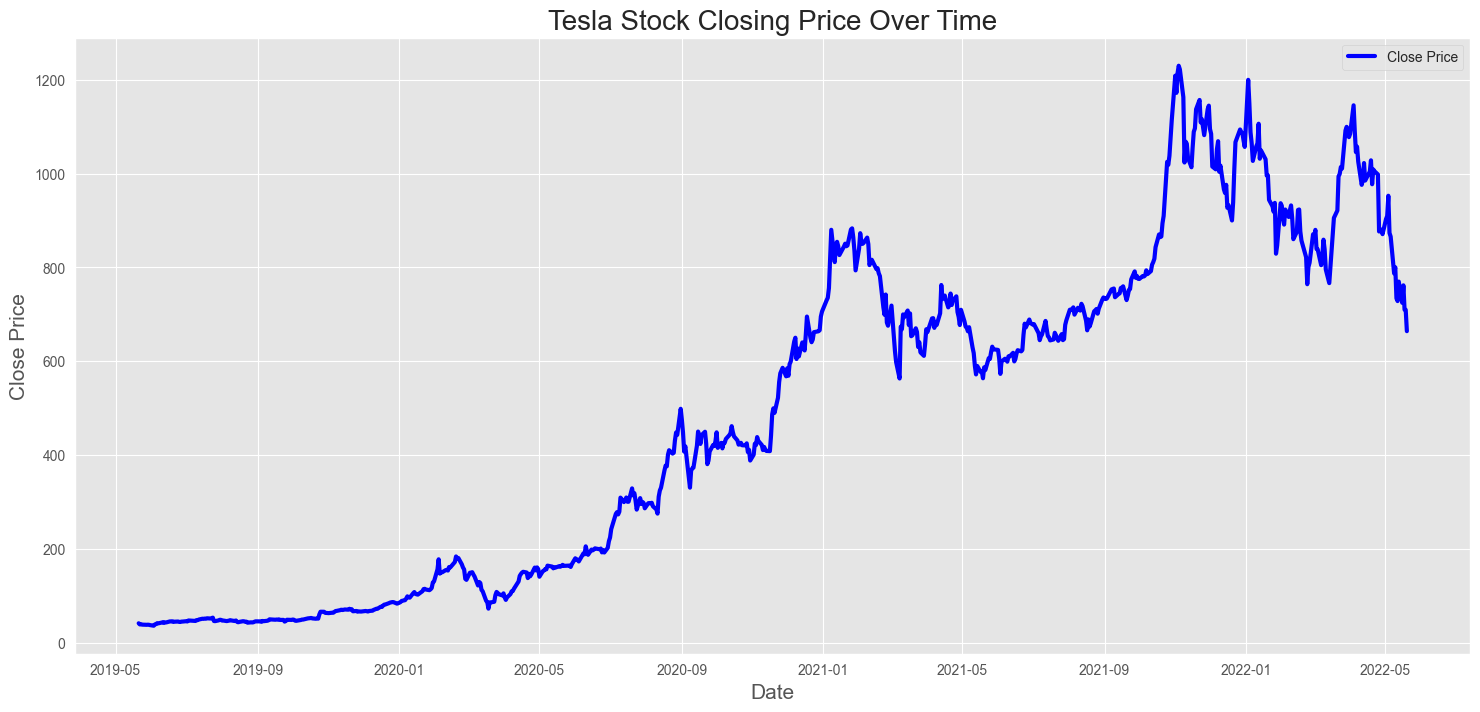

In [23]:
## plotting the close price

plt.figure(figsize=(18,8))
plt.style.use('ggplot') # to get the grid in the background
plt.grid(True) # to get the grid in the background
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price', fontsize=15)
plt.plot(stock['Close'], color='blue', linewidth=3, label='Close Price')
plt.title('Tesla Stock Closing Price Over Time', fontsize=20)
plt.legend()
plt.show()

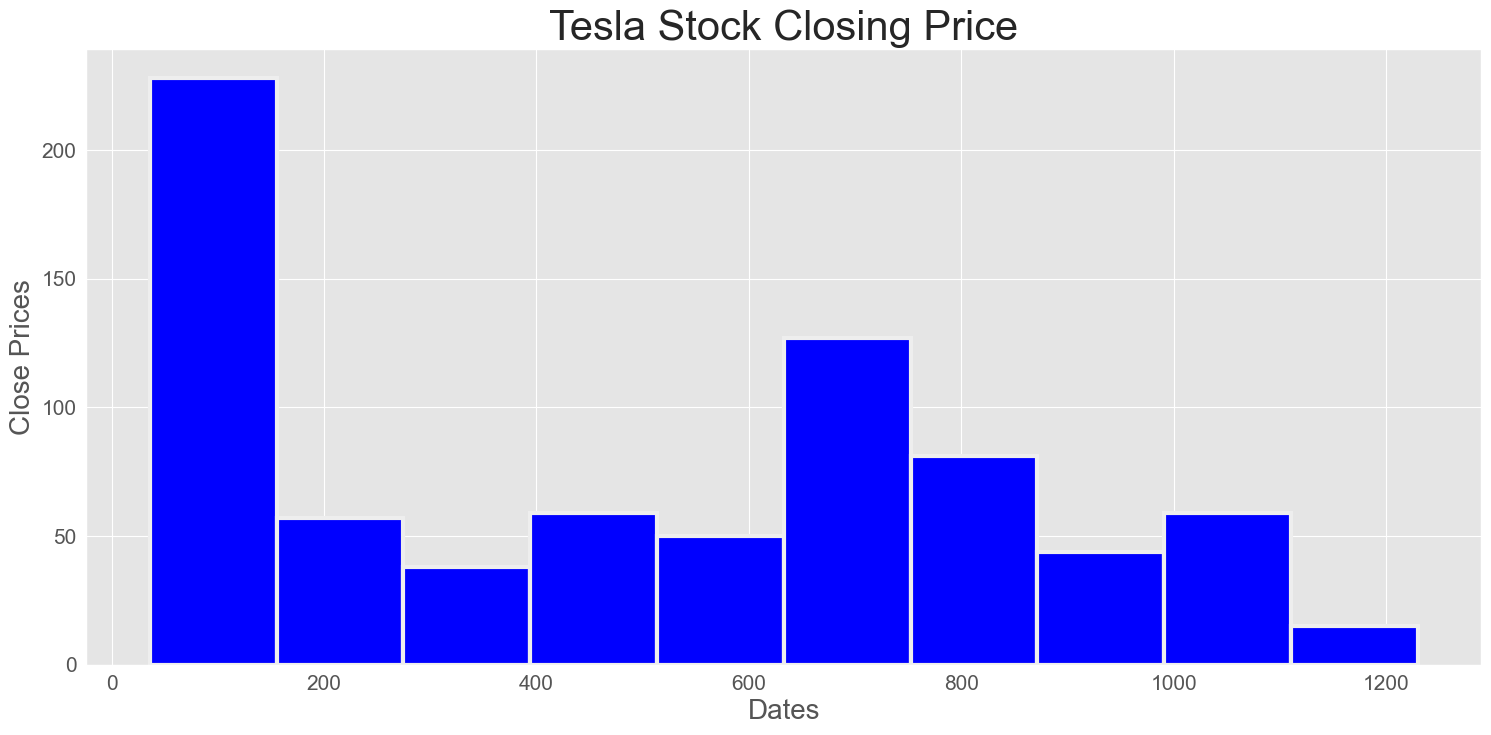

In [24]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.hist(stock['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

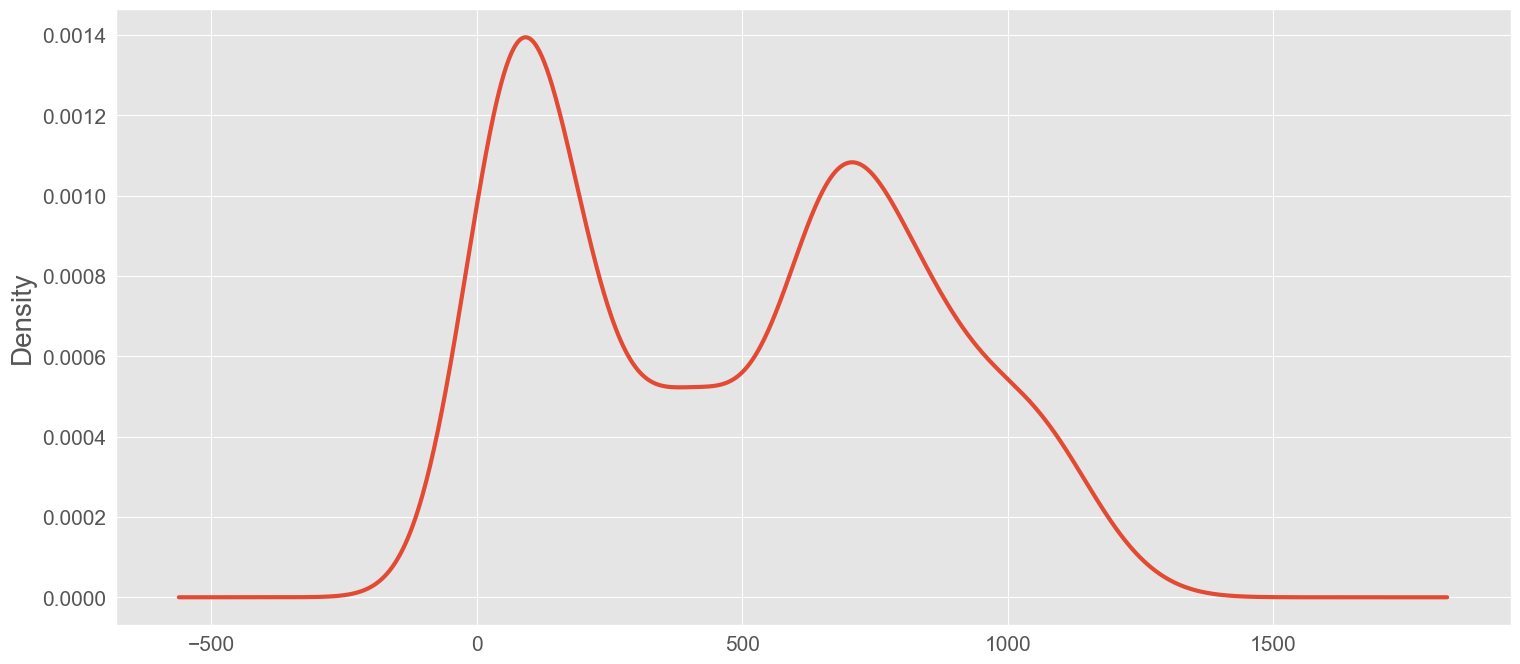

In [25]:
# Distribution of the close price
df_close = stock['Close']
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3)
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [26]:
# Plotting the rolling mean(Moving average) and rolling standard deviation of the Time Series data

stock['Close'].rolling(12)

Rolling [window=12,center=False,axis=0,method=single]

In [27]:
stock['Close']

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [28]:
#Finding moving average of the stock price 
# Moving average is used to smooth out the price data by creating a constantly updated average price.

rolmean = stock['Close'].rolling(365).mean()

#365 days moving average, 365 days is used to get the average of the stock price for the past 365 days
#365 in the window size is used to get the average of the stock price for the past 365 days

In [29]:
rolmean

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    812.017943
2022-05-17    812.478847
2022-05-18    812.782327
2022-05-19    812.967697
2022-05-20    813.006108
Name: Close, Length: 758, dtype: float64

In [30]:
rolstd = stock['Close'].rolling(365).std()
rolstd

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    164.116764
2022-05-17    163.736844
2022-05-18    163.442547
2022-05-19    163.286341
2022-05-20    163.249516
Name: Close, Length: 758, dtype: float64

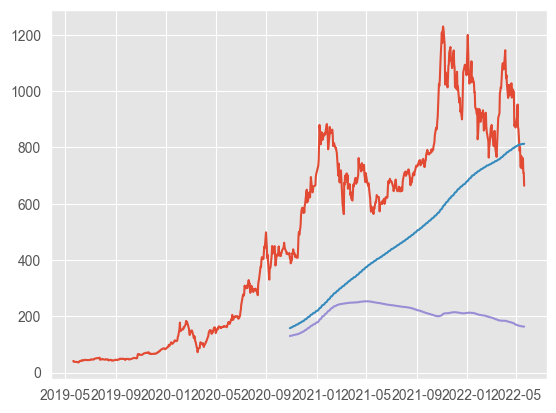

In [31]:
plt.plot(stock.Close)
plt.plot(rolmean)
plt.plot(rolstd)

In [32]:
from statsmodels.tsa.stattools import adfuller
# Augmented Dickey-Fuller test

adf = adfuller(stock['Close'])
adf

(-1.3630085817037496,
 0.5998762543050695,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [33]:
pd.Series(adf[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])


ADF Test Statistic      -1.363009
P-Value                  0.599876
# Lags Used              9.000000
# Observations Used    748.000000
dtype: float64

In [34]:
if adf[1] <= 0.05:
    print('The data is stationary')
else:
    print('The data is not stationary')


The data is not stationary


In [35]:
#Test Statistic is less than the 1% critical value, the null hypothesis is rejected.

def test_stationary(timeseries):
    
    ##Determing rolling statistics
    rolmean = timeseries.rolling(48).mean()## rolling means
    rolstd = timeseries.rolling(48).std()## rolling standard deviation
    
    #plot rolling statistics
    plt.figure(figsize=(18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue', label='Original',linewidth=3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth=3)
    plt.plot(rolstd, color='black', label='Rolling Std',linewidth=3)
    plt.legend(loc = 'best',fontsize = 20,shadow = True,facecolor = 'lightblue')
    plt.title('Rolling Mean & Standard Deviation',fontsize = 30)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False) # to display the plot in the console itself,block true means it will display the plot in the new window
    
    print('Dickey-Fuller Test Results:')
    adf = adfuller(timeseries,autolag= 'AIC' )
   #output for dft will give us without defining what the values are.
   #hence we manually write what values does it explains using a for loop
    output =  pd.Series(adf[0:4],index = ['Test Statistics','P-Value','No of Lags used','Number of observations used'])
    
    for key,value in adf[4].items():
        output['Critical value (%s)' %key] = value
    print(output)
    
    

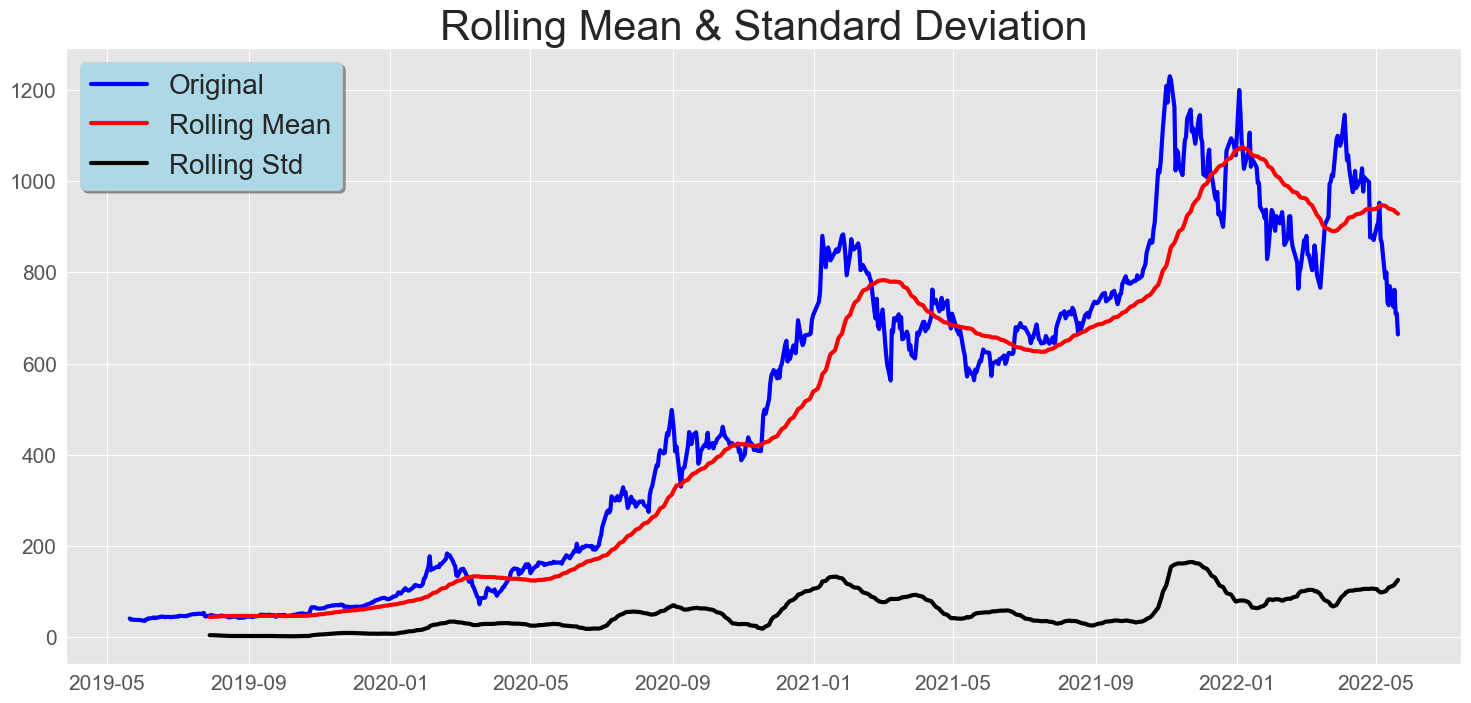

Dickey-Fuller Test Results:
Test Statistics                 -1.363009
P-Value                          0.599876
No of Lags used                  9.000000
Number of observations used    748.000000
Critical value (1%)             -3.439123
Critical value (5%)             -2.865412
Critical value (10%)            -2.568832
dtype: float64


In [142]:
stock_Close = stock['Close']
test_stationary(stock_Close)

<Axes: ylabel='Close'>

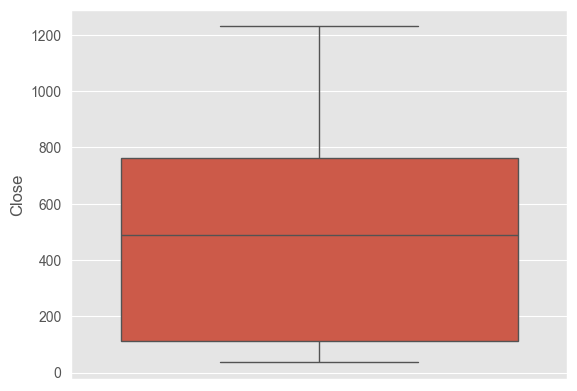

In [143]:
## checking outliers using boxplot

sns.boxplot(stock_Close)

In [145]:
## Time Series Decomposition: Decompose the Time Series data to check for any trends, seasonality, and noise.

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(stock_Close, period=12,model='multiplicative')


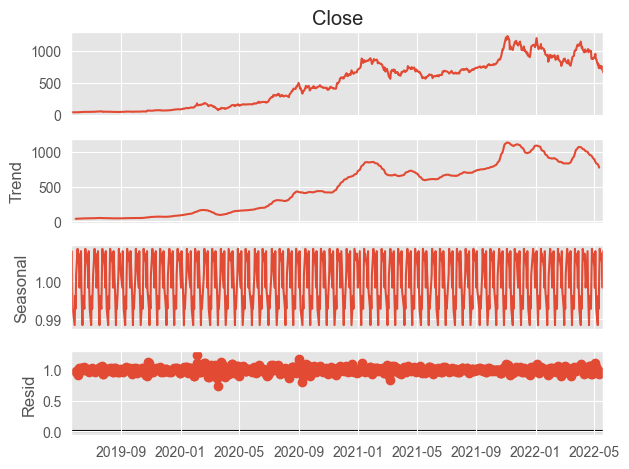

In [146]:
result.plot()
plt.show()

In [147]:
result.seasonal

Date
2019-05-21    0.998285
2019-05-22    1.007787
2019-05-23    0.997675
2019-05-24    0.992710
2019-05-28    0.988533
                ...   
2022-05-16    1.005393
2022-05-17    1.007126
2022-05-18    1.003538
2022-05-19    0.998285
2022-05-20    1.007787
Name: seasonal, Length: 758, dtype: float64

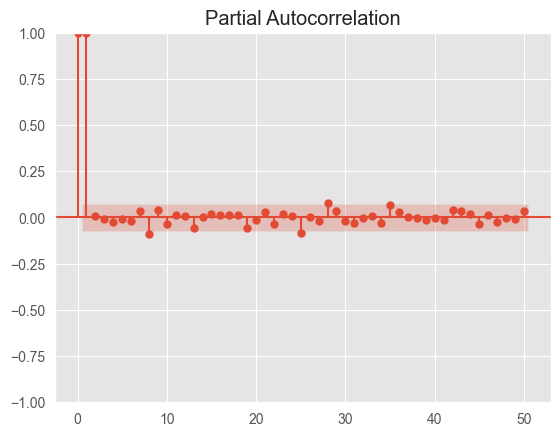

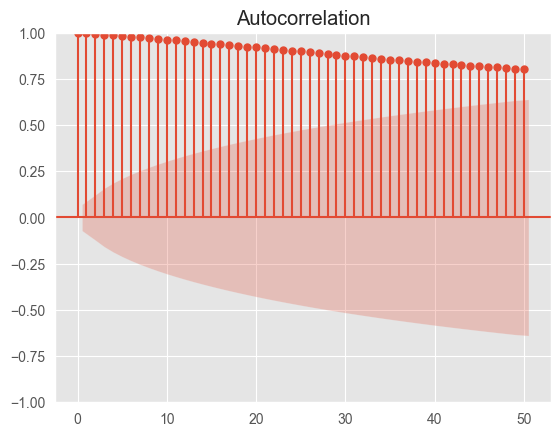

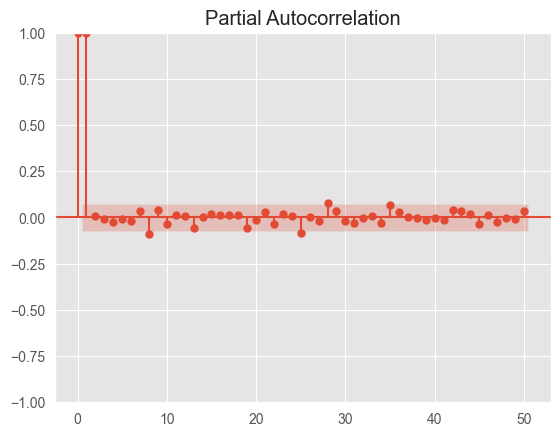

In [148]:
#Pacf and ACF plot

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(stock_Close, lags = 50)
plot_pacf(stock_Close, lags = 50)


### Preprocessing the data
1. Check for missing values
2. Handle missing values
3. Check for stationarity
4. Make the time series data stationary
5. if necessary normalize the data
6. Split the data into training and testing data
7. Scale the data #scale means to normalize the data,using minmax scaler
8. Reshape the data #reshape the data to fit the model
9. clean the data by removing any outliers

In [149]:
stock_Close.isnull().sum()
#df_close.diff().plot()

0

## Convert the data into stationary data
#### Stationarity is an important characteristic of time series data. A time series is said to be stationary if its statistical properties such as mean, variance remain constant over time.

#### There are two ways to check for stationarity:
#### 1. Rolling Statistics: Plot the moving average and moving standard deviation to see if they vary with time. The time series is stationary if they remain constant with time.
#### 2. Dickey-Fuller Test: The test results comprise the test statistic and critical value for different confidence levels. If the test statistic is less than the critical value, we can reject the null hypothesis and say that the series is stationary.

### To make the time series data stationary, we can use the following methods:
### 1. Differencing: Take the difference of the observation at a particular instant with that at the previous instant.
### 2. Decomposition: Decompose the time series data into trend, seasonality, and residuals.

In [150]:
#diferencing the data
#Differencing is a method used to make the time series data stationary.

stock_Close


Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [152]:
stock_Close =  stock_Close.diff()
stock_Close = stock_Close.dropna()

In [153]:
#Differencing the data

stock_Close 

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 757, dtype: float64

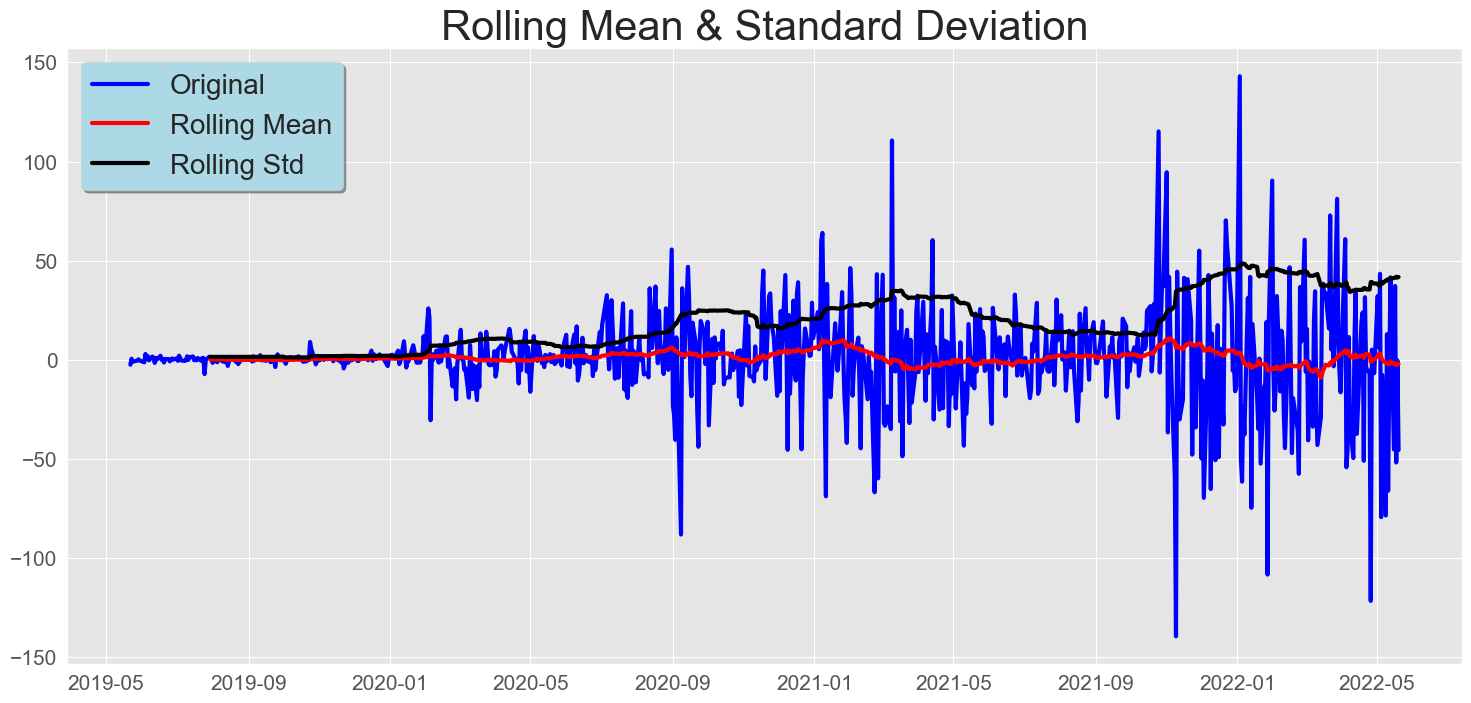

Dickey-Fuller Test Results:
Test Statistics               -8.324564e+00
P-Value                        3.498786e-13
No of Lags used                8.000000e+00
Number of observations used    7.480000e+02
Critical value (1%)           -3.439123e+00
Critical value (5%)           -2.865412e+00
Critical value (10%)          -2.568832e+00
dtype: float64


In [154]:
#testing the stationarity of the data

test_stationary(stock_Close)

In [47]:
#P value is less than 0.05, so we can reject the null hypothesis and say that the data is stationary.
#current P value is 3.498786e-13 = 0.0000000000003498786
#which is less than 0.05
# so we can reject the null hypothesis and say that the data is stationary


In [156]:
stock_Close[0:-60] #Training data
#Testing data


Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-02-17   -47.040039
2022-02-18   -19.369995
2022-02-22   -35.449951
2022-02-23   -57.490051
2022-02-24    36.730042
Name: Close, Length: 697, dtype: float64

In [157]:
stock_Close[-60:] 

Date
2022-02-25      9.099976
2022-02-28     60.559998
2022-03-01     -6.059998
2022-03-02     15.520020
2022-03-03    -40.600037
2022-03-04     -1.000000
2022-03-07    -33.709961
2022-03-08     19.820007
2022-03-09     34.569946
2022-03-10    -20.669983
2022-03-11    -42.950012
2022-03-14    -28.979980
2022-03-15     35.520020
2022-03-16     38.339966
2022-03-17     31.369995
2022-03-18     33.790039
2022-03-21     15.769958
2022-03-22     72.820007
2022-03-23      5.130005
2022-03-24     14.809998
2022-03-25     -3.279968
2022-03-28     81.199951
2022-03-29      7.729980
2022-03-30     -5.579956
2022-03-31    -16.390015
2022-04-01      6.989990
2022-04-04     60.859985
2022-04-05    -54.189941
2022-04-06    -45.500000
2022-04-07     11.500000
2022-04-08    -31.770020
2022-04-11    -49.559998
2022-04-12     11.020020
2022-04-13     35.419983
2022-04-14    -37.369995
2022-04-18     19.289978
2022-04-19     23.860046
2022-04-20    -50.950012
2022-04-21     31.580017
2022-04-22     -3.73

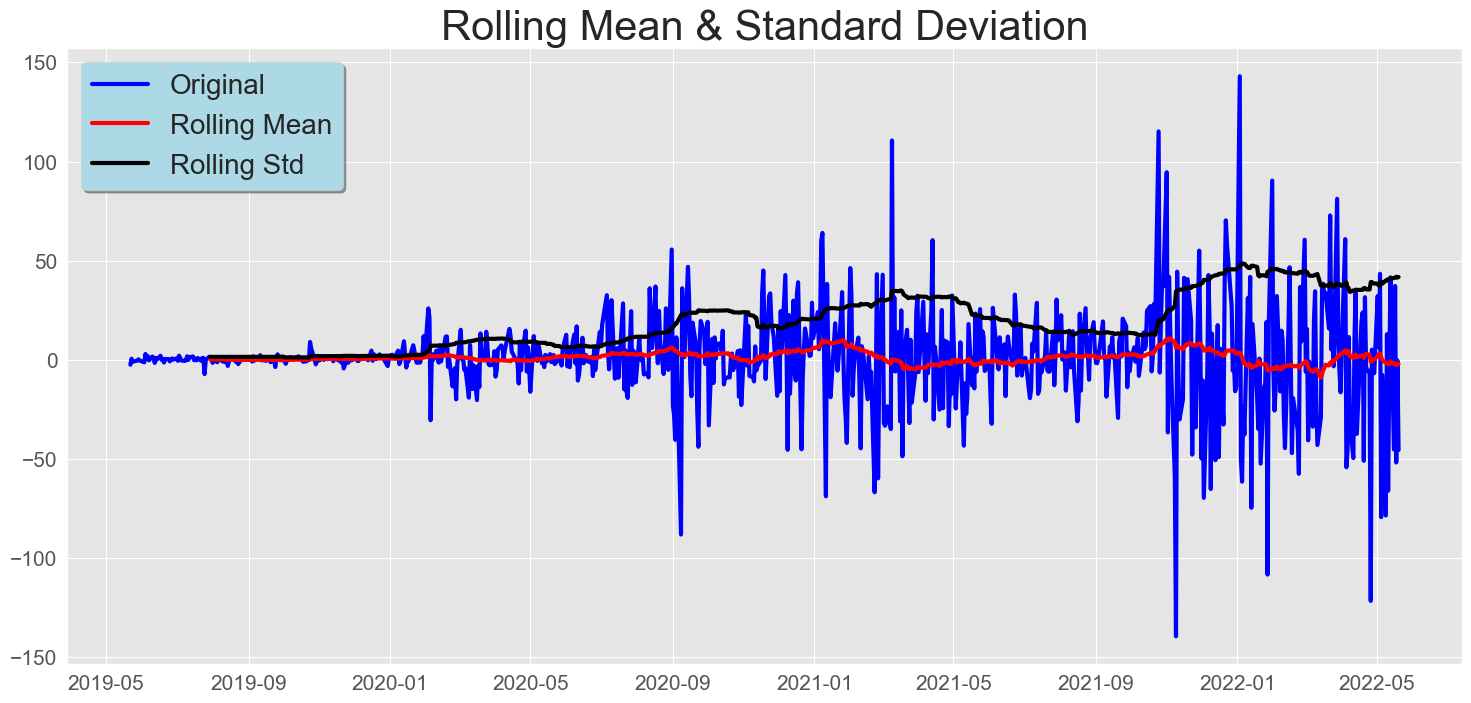

Dickey-Fuller Test Results:
Test Statistics               -8.324564e+00
P-Value                        3.498786e-13
No of Lags used                8.000000e+00
Number of observations used    7.480000e+02
Critical value (1%)           -3.439123e+00
Critical value (5%)           -2.865412e+00
Critical value (10%)          -2.568832e+00
dtype: float64


In [158]:
test_stationary(stock_Close)




In [159]:
stock_Close.shape

(757,)

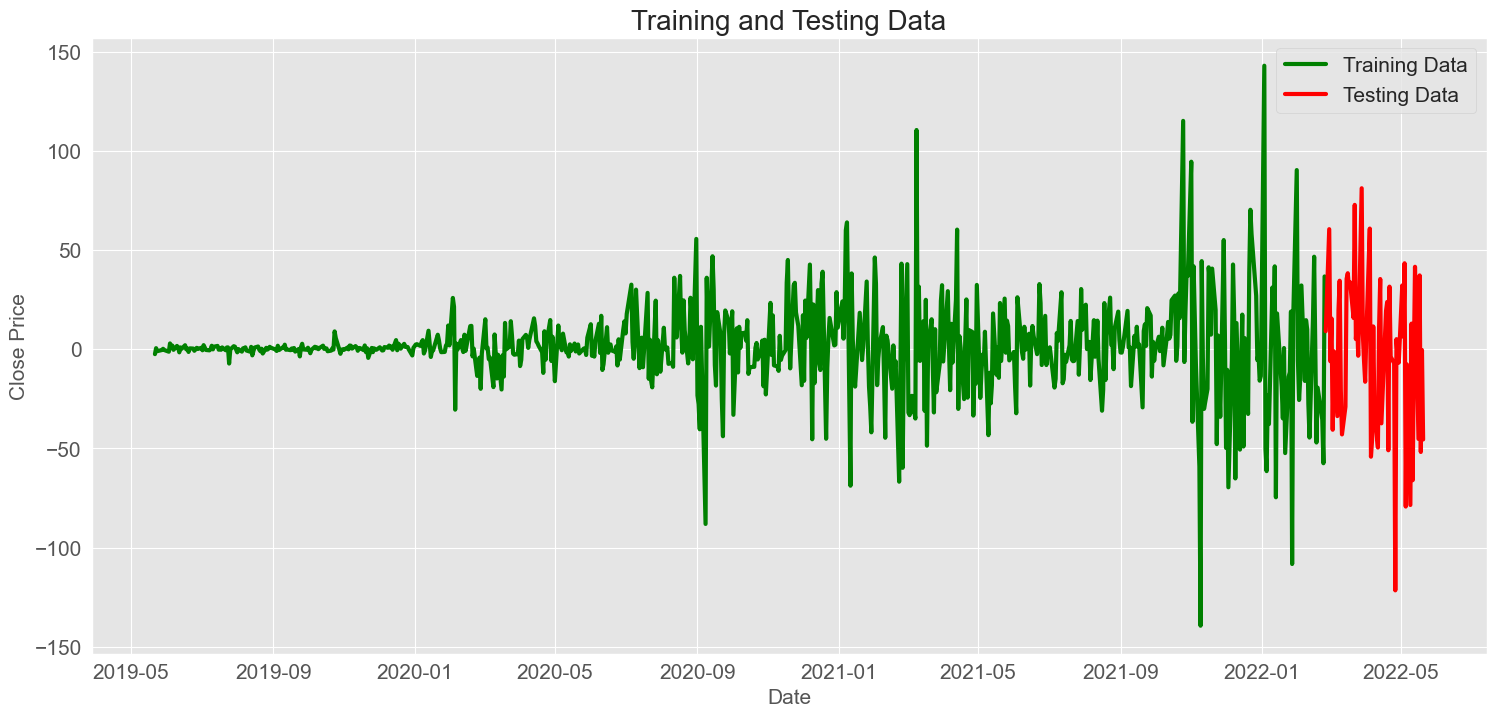

In [160]:
# Split the data into training and testing data

train_data = stock_Close[0:-60]
test_data = stock_Close[-60:]
plt.figure(figsize=(18,8))
plt.grid('True')
plt.plot(train_data, color='green', linewidth=3)
plt.plot(test_data, color='red', linewidth=3)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price', fontsize=15)
plt.title('Training and Testing Data', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Training Data', 'Testing Data'], fontsize=15)
plt.show()


In [165]:
stock_Close.info

<bound method Series.info of Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 757, dtype: float64>

In [166]:
## model building
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np


In [190]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Initialize the best parameters and the best AIC to large numbers
best_pdq = None
best_aic = float('inf')

# Grid search
for param in pdq:
    try:
        model = ARIMA(history, order=param)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_pdq = param
    except:
        continue

print(f'Best ARIMA parameters: {best_pdq}')

Best ARIMA parameters: (0, 1, 1)


Best ARIMA parameters: (0, 1, 1)
RMSE: 39.61136729791809


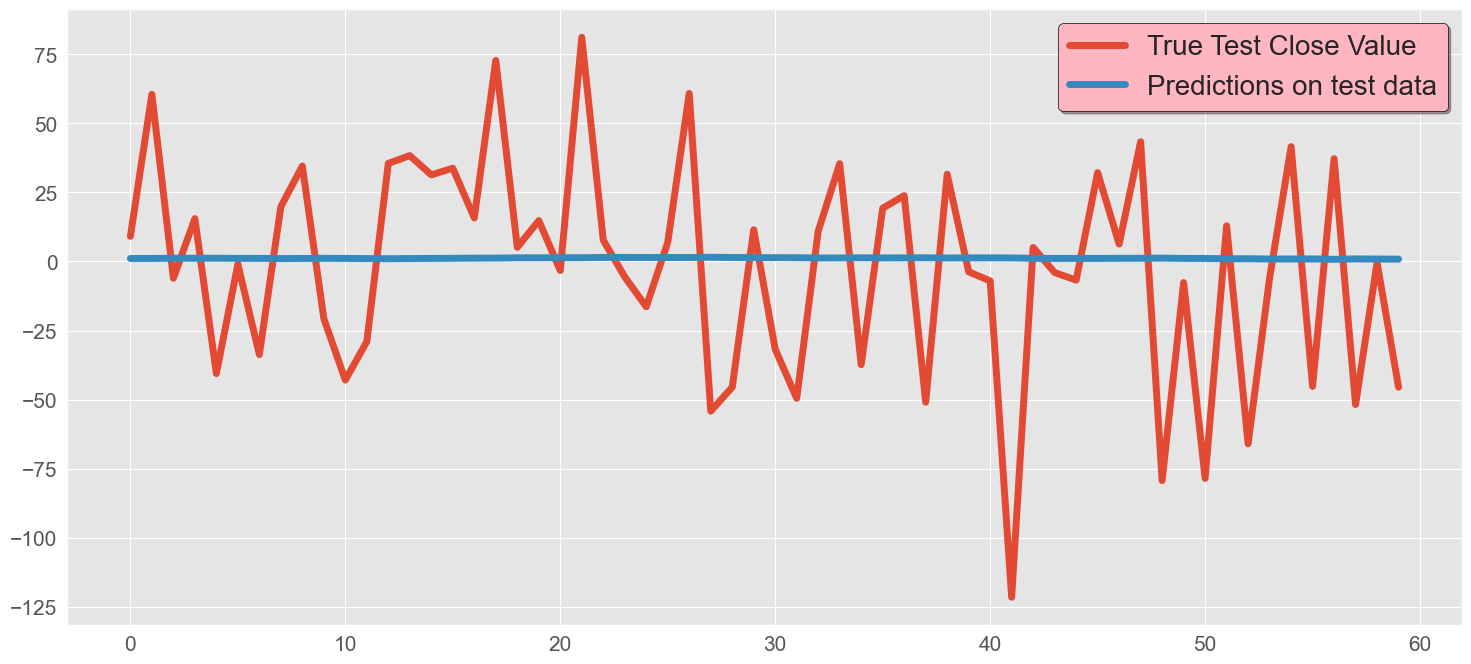

In [192]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Initialize the best parameters and the best AIC to large numbers
best_pdq = None
best_aic = float('inf')

# Grid search
for param in pdq:
    try:
        model = ARIMA(train_data, order=param)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_pdq = param
    except:
        continue

print(f'Best ARIMA parameters: {best_pdq}')

# Model building with the best parameters
history = [x for x in train_data]
predictions = list()
for i in range(len(test_data)):
    model = ARIMA(history, order=best_pdq)
    model_fit = model.fit()
    fc = model_fit.forecast(alpha=0.05)  # alpha is the confidence level
    predictions.append(fc[0])  # append the forecasted value, not the whole result
    history.append(test_data[i])  # append the test data to history

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"RMSE: {rmse}")

# Plotting the actual vs predicted values
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)), test_data, label='True Test Close Value', linewidth=5)
plt.plot(range(len(predictions)), predictions, label='Predictions on test data', linewidth=5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')
plt.show()

In [167]:
#taking the train data into list format
history = [x for x in train_data]
history

[-2.4699974060058594,
 0.5519981384277415,
 -0.9720001220703125,
 -0.385997772216804,
 0.23199844360351562,
 -0.3279991149902344,
 -0.61199951171875,
 -1.2380027770996094,
 2.9260025024414062,
 0.5979995727539062,
 1.871997833251946,
 -0.289997100830071,
 1.6759986877441406,
 0.8439979553222656,
 -1.5679969787597656,
 0.9300003051757812,
 0.20199966430664062,
 2.0219993591308594,
 -0.0579986572265625,
 0.3379974365234375,
 -1.36199951171875,
 0.4480018615722656,
 0.3559989929199219,
 -0.7760009765625,
 -0.09799957275390625,
 0.7140007019042969,
 0.12400054931640625,
 0.7419967651367259,
 -0.523998260498054,
 2.0699996948242188,
 -0.3600006103515625,
 -0.5519981384277344,
 -0.055999755859375,
 1.7719993591308665,
 -0.06399917602539773,
 1.2959976196289062,
 1.6840019226074219,
 -0.2239990234375,
 0.4959983825683594,
 -0.26399993896484375,
 0.9280014038085938,
 -0.5,
 0.8979988098144602,
 0.9420013427734304,
 -7.212001800537102,
 -0.15599822998047586,
 1.5459976196289062,
 1.298000335693

In [168]:
#model building

model = ARIMA(history, order=(1,1,1))
model

In [169]:
model = model.fit()

In [170]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  697
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3148.870
Date:                Thu, 04 Jul 2024   AIC                           6303.741
Time:                        03:46:41   BIC                           6317.377
Sample:                             0   HQIC                          6309.013
                                - 697                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0285      0.025     -1.150      0.250      -0.077       0.020
ma.L1         -0.9991      0.012    -81.342      0.000      -1.023      -0.975
sigma2       493.6006     12.978     38.035      0.000     468.165     519.036
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2092.37
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              31.85   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

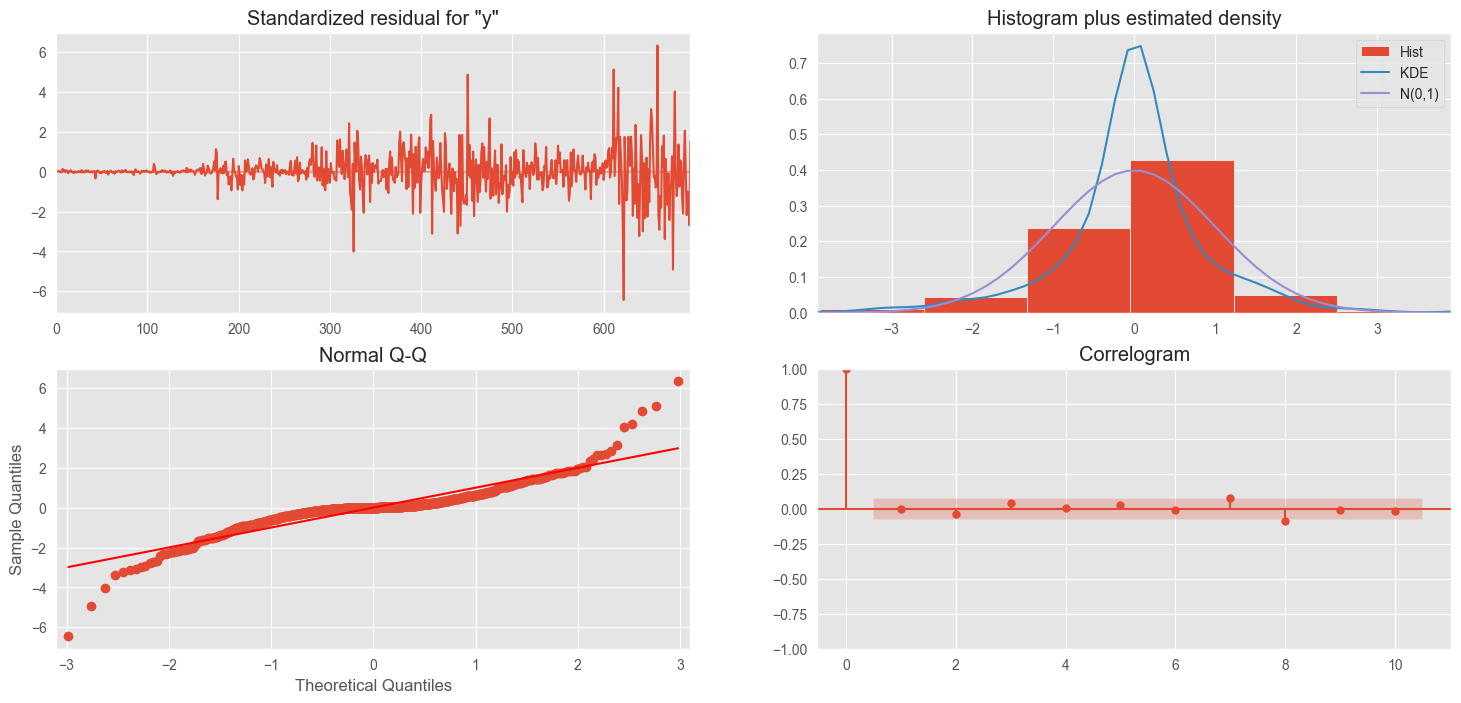

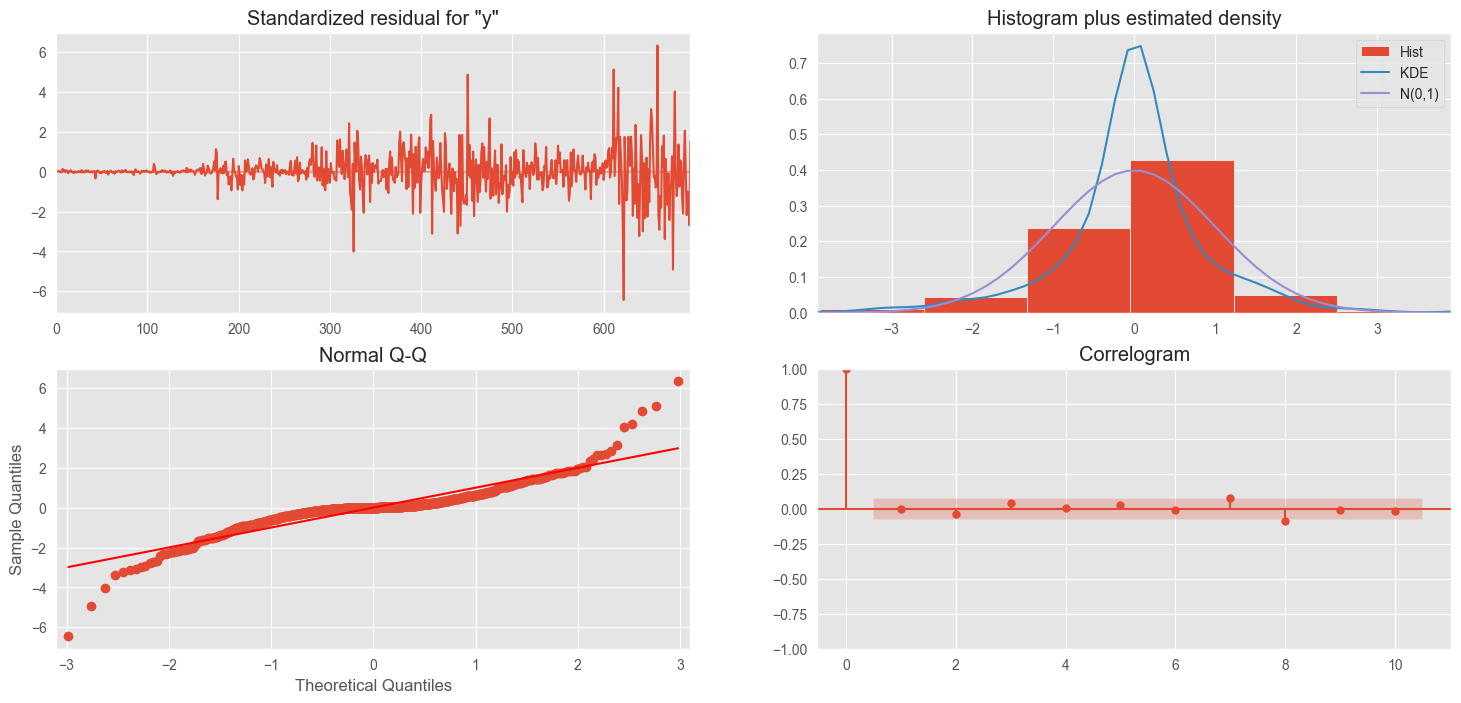

In [171]:
model.plot_diagnostics(figsize=(18,8))

In [175]:
len(history)

697

In [172]:
model.forecast()



array([0.04741638])

In [173]:
#for next 60 points
model.forecast(25)

array([0.04741638, 1.09307405, 1.06326702, 1.06411669, 1.06409247,
       1.06409316, 1.06409314, 1.06409314, 1.06409314, 1.06409314,
       1.06409314, 1.06409314, 1.06409314, 1.06409314, 1.06409314,
       1.06409314, 1.06409314, 1.06409314, 1.06409314, 1.06409314,
       1.06409314, 1.06409314, 1.06409314, 1.06409314, 1.06409314])

In [174]:
##Checking mean squared error

mean_squared_error([test_data[0]], model.forecast())

81.94882822933381

In [85]:
np.sqrt(mean_squared_error([test_data[0]], model.forecast()))

C:\Users\Shadab Khan\AppData\Local\Temp\ipykernel_20108\3530432747.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.sqrt(mean_squared_error([test_data[0]], model.forecast()))


9.052559208827844

In [103]:
## Making Predictions
def make_predictions(X,y,arima_order):
    history = [x for x in X]
    predictions = list()
    for i in range(len(y)):
        model = ARIMA(history, order = arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0] #[0] is used to get the forecasted value
        predictions.append(yhat)
        history.append(y[i])
    #calculate sample error
    
    rmse = np.sqrt(mean_squared_error(y,predictions))
    return rmse


In [176]:
#evaluate the model

def evaluate_models(dataset,test,p_values,d_values,q_values):
    dataset = dataset.astype('float32')
    best_score,best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = make_predictions(dataset,test,order)
                    if rmse < best_score:
                        best_score,best_cfg = rmse,order
                    print('AIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg,best_score))



In [180]:
import warnings
warnings.filterwarnings('ignore')

p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)
evaluate_models(train_data,test_data,p_values,d_values,q_values)

AIMA(0, 0, 0) RMSE=39.610
AIMA(0, 0, 1) RMSE=39.578
AIMA(0, 0, 2) RMSE=39.728
AIMA(0, 1, 0) RMSE=57.835
AIMA(0, 1, 1) RMSE=39.611
AIMA(0, 1, 2) RMSE=39.580
AIMA(0, 2, 0) RMSE=104.683
AIMA(0, 2, 1) RMSE=57.876
AIMA(0, 2, 2) RMSE=39.634
AIMA(1, 0, 0) RMSE=39.570
AIMA(1, 0, 1) RMSE=39.636
AIMA(1, 0, 2) RMSE=40.047
AIMA(1, 1, 0) RMSE=46.184
AIMA(1, 1, 1) RMSE=39.572
AIMA(1, 1, 2) RMSE=39.731
AIMA(1, 2, 0) RMSE=68.740
AIMA(1, 2, 1) RMSE=46.221
AIMA(1, 2, 2) RMSE=39.451
AIMA(2, 0, 0) RMSE=39.746
AIMA(2, 0, 1) RMSE=39.884
AIMA(2, 0, 2) RMSE=40.078
AIMA(2, 1, 0) RMSE=45.781
AIMA(2, 1, 1) RMSE=39.739
AIMA(2, 1, 2) RMSE=39.732
AIMA(2, 2, 0) RMSE=63.008
AIMA(2, 2, 1) RMSE=45.809
Best ARIMA(1, 2, 2) RMSE=39.451


In [187]:
#Model building
history = [x for x in train_data]
predictions = list()
for i in range(len(test_data)):
    model = ARIMA(history,order = (1,2,2))
    model = model.fit()
    fc = model.forecast(alpha=0.05) #alpha is the confidence level
    predictions.append(fc[0])
    history.append(test_data[i])
print(f"my RMSE is {np.sqrt(mean_squared_error(test_data,predictions))}")

    

my RMSE is 39.46661090028392


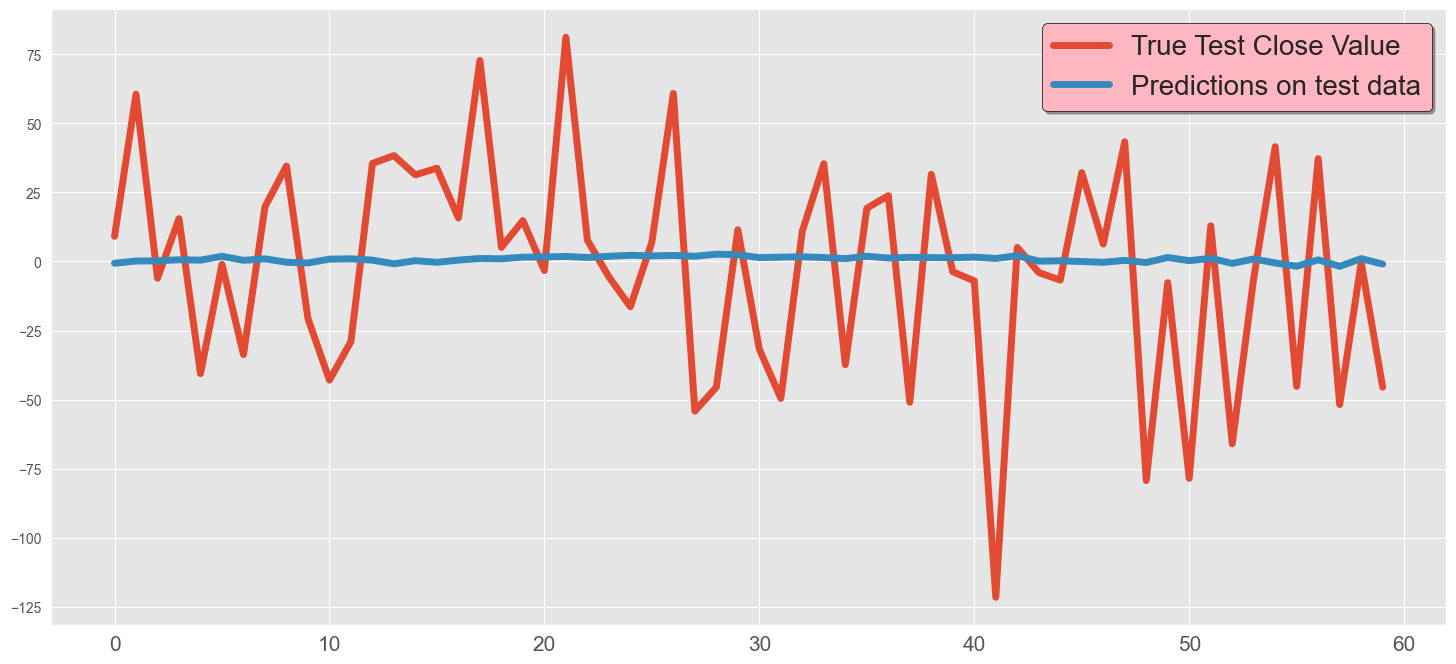

In [188]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

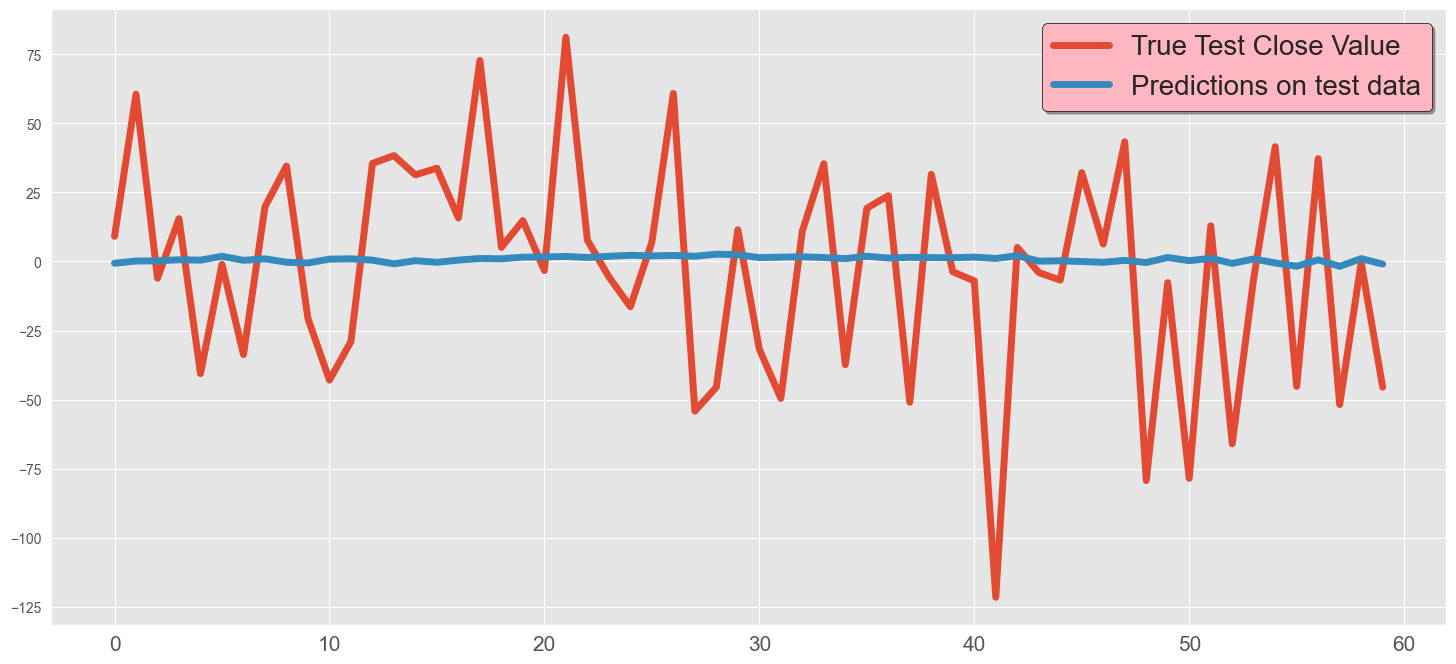

In [186]:
#plot actual vs predicted

plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()
    
